In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.engine import base_layer_utils
from keras.utils import tf_utils
from keras import activations
from keras import backend
from keras import constraints
from keras import initializers
from keras import regularizers
from keras.engine.base_layer import Layer
from keras.engine.input_spec import InputSpec
import tensorflow.compat.v2 as tf
from tensorflow.python.util.tf_export import keras_export

In [21]:
# Importing libraries 
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df1=pd.read_csv('/Users/macair/fake_job_postings.csv')
df1.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [23]:
df1.describe()  #csv데이터의 요약정보 count:컬럼별 총 데이터 수 mean/std:총 데이터의 평균,표준편차

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

/Users/macair/miniforge3/envs/test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


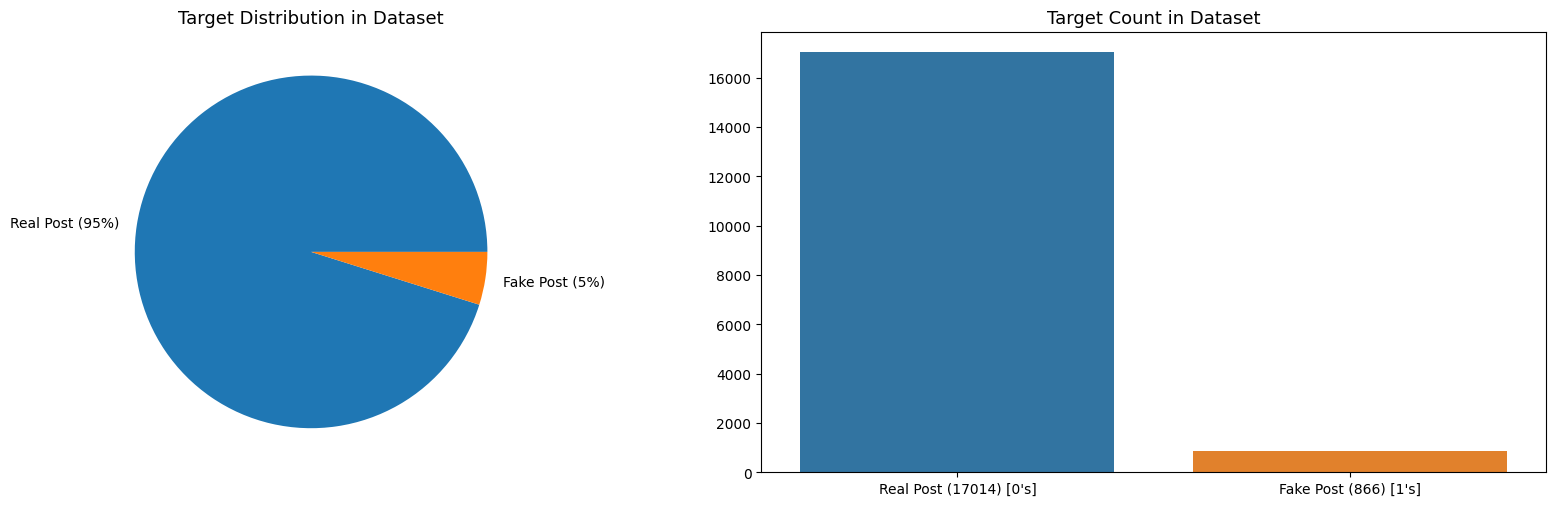

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df1["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df1["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

In [26]:
df=df1[['description','requirements','fraudulent']] #몇가지 데이터만 가져와서 사용
df.head()

,description,requirements,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0


In [27]:
###Drop Nan Values
df=df.dropna() #nan값 행 삭제

In [28]:
df.shape

(15185, 3)

In [29]:
## Get the Independent Features 사기데이터를 제외한 다른 데이터 aixs:세로방향
X=df.drop('fraudulent',axis=1)

In [30]:
## Get the Dependent features
y=df['fraudulent']

In [31]:
y.value_counts() #0:진실 1:사기

0    14473
1      712
Name: fraudulent, dtype: int64

In [32]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [33]:
voc_size=5000

In [34]:
message = X.copy()

In [35]:
message['description'][3]

"THE COMPANY: ESRI – Environmental Systems Research InstituteOur passion for improving quality of life through geography is at the heart of everything we do.\xa0 Esri’s geographic information system (GIS) technology inspires and enables governments, universities and businesses worldwide to save money, lives and our environment through a deeper understanding of the changing world around them.Carefully managed growth and zero debt give Esri stability that is uncommon in today's volatile business world.\xa0 Privately held, we offer exceptional benefits, competitive salaries, 401(k) and profit-sharing programs, opportunities for personal and professional growth, and much more.THE OPPORTUNITY: Account ExecutiveAs a member of the Sales Division, you will work collaboratively with an account team in order to sell and promote adoption of Esri’s ArcGIS platform within an organization. As part of an account team, you will be responsible for facilitating the development and execution of a set of 

In [36]:
message.reset_index(inplace=True)

In [ ]:
#데이터 전처리

import nltk
import re
from nltk.corpus import stopwords

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.stem.porter import PorterStemmer  #불용어 제거+어간추출
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['description'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [42]:
corpus[3]

'compani esri environment system research instituteour passion improv qualiti life geographi heart everyth esri geograph inform system gi technolog inspir enabl govern univers busi worldwid save money live environ deeper understand chang world around care manag growth zero debt give esri stabil uncommon today volatil busi world privat held offer except benefit competit salari k profit share program opportun person profession growth much opportun account executivea member sale divis work collabor account team order sell promot adopt esri arcgi platform within organ part account team respons facilit develop execut set strategi defin portfolio account execut strategi util experi enterpris sale help custom leverag geospati inform technolog achiev busi goal specif prospect develop opportun partner key stakehold envis develop implement locat strategi organizationclearli articul strength valu proposit arcgi platformdevelop maintain healthi pipelin opportun busi growthdemonstr thought understa

In [43]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[1]

[538,
 85,
 1702,
 984,
 1284,
 3982,
 831,
 4017,
 2776,
 4665,
 4542,
 2089,
 517,
 447,
 3288,
 591,
 652,
 4836,
 2678,
 1722,
 3642,
 51,
 519,
 2341,
 831,
 2068,
 1015,
 3157,
 2892,
 3705,
 2744,
 3631,
 1420,
 2809,
 3042,
 2341,
 3130,
 3982,
 831,
 728,
 4733,
 2851,
 3021,
 548,
 3446,
 517,
 517,
 4713,
 351,
 519,
 3446,
 517,
 2687,
 2028,
 3298,
 2341,
 1035,
 1993,
 758,
 3633,
 2602,
 3454,
 4169,
 2152,
 4920,
 4331,
 3130,
 3717,
 4492,
 3212,
 2628,
 1002,
 2851,
 472,
 3616,
 1416,
 1486,
 1583,
 1527,
 3895,
 2794,
 2959,
 4492,
 2851,
 2794,
 1276,
 3926,
 2809,
 51,
 519,
 2341,
 831,
 487,
 4132,
 2834,
 3655,
 4497,
 509,
 1774,
 4060,
 4033,
 1079,
 1079,
 1774,
 1015,
 3591,
 3926,
 2809,
 51,
 519,
 2341,
 831,
 1536,
 3633,
 449,
 1185,
 4686,
 3138,
 1301,
 519,
 4055,
 1023,
 4713,
 1067,
 2809,
 3323,
 3876,
 517,
 27,
 51,
 4647,
 3485,
 3926,
 2537,
 3509,
 4943,
 272,
 1369,
 1075,
 1993,
 1189,
 519,
 2341,
 4235,
 517,
 4304,
 2744,
 519,
 3446,
 

In [44]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[3993 4055  517 ... 4583 2360   92]
 [4713 3194 3336 ... 1807 1165 2526]
 [   0    0    0 ...  395 3645 3549]
 ...
 [2811 4867 2983 ... 3251 2811  329]
 [3830 2243 4184 ... 2092 1416 3446]
 [ 383 4787 2095 ... 2453 3061 1662]]


In [45]:
embedded_docs[0]

array([3993, 4055,  517, 4760, 4870, 4419, 3624,  292,  217, 1773,  914,
        914,  217,  611, 1435, 1995,  217, 4409,  217, 1248, 1898, 2202,
       4544, 3049,  609, 3288, 1993, 2151, 4475, 4251, 4337, 3967,  580,
       2883, 3581, 4773,  239, 4583, 2360,   92], dtype=int32)

### 모델 만들기

In [81]:
#딥러닝 모델-양방향 LSTM

class TimeBiLSTM:
    def __init__(self, Wx1, Wh1, b1,
                 Wx2, Wh2, b2, stateful=False):
        self.forward_lstm = TimeLSTM(Wx1, Wh1, b1, stateful)
        self.backward_lstm = TimeLSTM(Wx2, Wh2, b2, stateful)
        self.params = self.forward_lstm.params + self.backward_lstm.params
        self.grads = self.forward_lstm.grads + self.backward_lstm.grads

    def forward(self, xs):
        o1 = self.forward_lstm.forward(xs)
        o2 = self.backward_lstm.forward(xs[:, ::-1])
        o2 = o2[:, ::-1]

        out = np.concatenate((o1, o2), axis=2)
        return out

    def backward(self, dhs):
        H = dhs.shape[2] // 2
        do1 = dhs[:, :, :H]
        do2 = dhs[:, :, H:]

        dxs1 = self.forward_lstm.backward(do1)
        do2 = do2[:, ::-1]
        dxs2 = self.backward_lstm.backward(do2)
        dxs2 = dxs2[:, ::-1]
        dxs = dxs1 + dxs2
        return dxs

In [68]:
#출력을 하나로 모으기 위한 마지막 Dense층 구현

class MyDense(Layer):
  def __init__(self,
               units,
               activation=True,
               use_bias=True,
               kernel_initializer='glorot_uniform',
               bias_initializer='zeros',
               **kwargs):
    super(MyDense, self).__init__(**kwargs)
    self.units = int(units)
    self.activation = activations.get(activation)
    self.use_bias = use_bias
    self.kernel_initializer = initializers.get(kernel_initializer)
    self.bias_initializer = initializers.get(bias_initializer)
    
  def build(self, input_shape):
    input_shape = tf.TensorShape(input_shape)
    last_dim = tf.compat.dimension_value(input_shape[-1])
    
    self.kernel = self.add_weight(
        'kernel',
        shape=[last_dim, self.units],
        initializer=self.kernel_initializer)
    self.bias = self.add_weight(
        'bias',
        shape=[self.units,],
        initializer=self.bias_initializer)
    
  def call(self, inputs):
    rank = inputs.shape.rank
    if rank == 2:
      outputs = tf.matmul(a=inputs, b=self.kernel)
    elif rank>=3:
      outputs = tf.tensordot(inputs, self.kernel, [[rank - 1], [0]])

    if self.use_bias:
      outputs = tf.nn.bias_add(outputs, self.bias)
    return outputs

  def compute_output_shape(self, input_shape):
    return input_shape[:-1].concatenate(self.units)
  
  #Units: 출력 뉴런의 수 결정
  #Activation: 활성화 함수
  #use_bias: 레이어가 벡터를 사용하는지 여부
  #kernel_initializer='glorot_uniform’ : 균일분포로 파라미터 초기값 생성, 가중치 텐서의 크기에 따라 값을 조절하는 방식의 하나
  #bias_initializer='zeros＇ : 지정한 파라미터 값을 0으로 생성

In [83]:
## Creating model
embedding_vector_features=50
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(MyDense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 40, 50)            250000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               120800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
my_dense_2 (MyDense)         (None, 1)                 201       
Total params: 371,001
Trainabl

In [71]:
#모델 훈련

len(embedded_docs),y.shape

(15185, (15185,))

In [72]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [73]:
X_final[1]

array([4713, 3194, 3336,  213, 1738, 3052, 2683, 3926, 4713, 3139,  519,
       1376, 4169, 3633, 1541, 2809,  823, 1541, 3548, 2076, 1202, 4741,
        604,  609, 1634, 4943, 1727, 3089, 2202, 3929, 1634,  609, 1964,
       2794,  481,  124, 3801, 1807, 1165, 2526], dtype=int32)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=32)

In [75]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=15,batch_size=64)

2021-12-09 02:54:59.100436: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-09 02:54:59.103966: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15


2021-12-09 02:54:59.842512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-09 02:55:00.036910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-09 02:55:00.047509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



  1/134 [..............................] - ETA: 3:07 - loss: 0.6278 - accuracy: 0.9531

2021-12-09 02:55:00.344861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-09 02:55:00.357958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


134/134 [==============================] - ETA: 0s - loss: 0.1895 - accuracy: 0.9556

2021-12-09 02:55:05.621959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-09 02:55:05.668175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-09 02:55:05.674981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


134/134 [==============================] - 7s 44ms/step - loss: 0.1895 - accuracy: 0.9556 - val_loss: 0.1768 - val_accuracy: 0.9575
Epoch 2/15
134/134 [==============================] - 5s 39ms/step - loss: 0.1775 - accuracy: 0.9556 - val_loss: 0.1702 - val_accuracy: 0.9575
Epoch 3/15
134/134 [==============================] - 5s 39ms/step - loss: 0.1792 - accuracy: 0.9556 - val_loss: 0.1661 - val_accuracy: 0.9575
Epoch 4/15
134/134 [==============================] - 5s 39ms/step - loss: 0.2012 - accuracy: 0.9556 - val_loss: 0.2162 - val_accuracy: 0.9575
Epoch 5/15
134/134 [==============================] - 5s 39ms/step - loss: 0.2233 - accuracy: 0.9550 - val_loss: 0.1920 - val_accuracy: 0.9575
Epoch 6/15
134/134 [==============================] - 5s 39ms/step - loss: 0.1997 - accuracy: 0.9556 - val_loss: 0.1850 - val_accuracy: 0.9575
Epoch 7/15
134/134 [==============================] - 5s 39ms/step - loss: 0.1910 - accuracy: 0.9555 - val_loss: 0.1810 - val_accuracy: 0.9575
Epoch 8/15

In [77]:
print('\n테스트 정확도 : %.4f'%(model1.evaluate(X_test,y_test)[1]))

119/119 [==============================] - 1s 12ms/step - loss: 0.5317 - accuracy: 0.9442

테스트 정확도 : 0.9442
